<center><h1><b> Tensorboard Introduction</b></h1></center>

Tensorboard is tensorflow's visualization toolkit

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt


%matplotlib inline

In [21]:
(X_train, y_train), (X_test, y_test)  = keras.datasets.mnist.load_data()

In [22]:
X_train.shape

(60000, 28, 28)

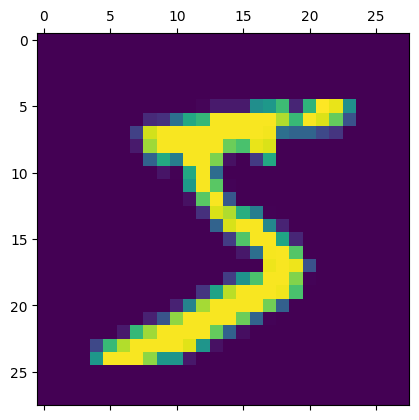

In [23]:
plt.matshow(X_train[0]);

### X_train Flattening i.e changing from 2 dimesion to 1 dimesion

In [19]:
#X_train_flat = X_train.reshape(len(X_train), 28*28)  # 28 * 28 is the 2d dimension of the image
#X_train_flat.shape

In [7]:
#X_test_flat = X_test.reshape(len(X_test), 28 * 28)
#X_test_flat.shape

In [24]:
# Neural Network definning
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Define the input shape here
    keras.layers.Dense(100, activation = 'relu'),  ## 100 hidden layers are used
    keras.layers.Dense(10, activation='sigmoid')  # this is the output layer. The expected output is any value between 0 - 9, making it 10 
])  # Sequential means layers will be stacked. Dense means all layers in the input 28 x 28 (784) are connected with all layers in output(10)

In [25]:
# This will compile the neural network
model.compile(optimizer='adam',  # It allows efficient training
              loss='sparse_categorical_crossentropy', # This is used because the output is categorical. there are other options that can be used
              metrics=['accuracy']
             )

In [26]:
# Buildig the model
model.fit(X_train, y_train, epochs=5) # epochs mean number of iteration the neural network will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7837 - loss: 7.5461
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8832 - loss: 0.4849
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9098 - loss: 0.3416
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9273 - loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9373 - loss: 0.2315


In [27]:
# Evaluatig the accuracy of the model on test dataset
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9270 - loss: 0.3245


[0.2778833210468292, 0.9351999759674072]

### Trying different parameter & Visualizing with Tensorboard

In [37]:
# Neural Network definning
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Define the input shape here
    keras.layers.Dense(100, activation = 'relu'),  ## 100 hidden layers are used
    keras.layers.Dense(10, activation='sigmoid')  # this is the output layer. The expected output is any value between 0 - 9, making it 10 
])  # Sequential means layers will be stacked. Dense means all layers in the input 28 x 28 (784) are connected with all layers in output(10)

# creating tensorboard callback for visualizing the epochs
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/SGD', histogram_freq=1)
# This will compile the neural network
model1.compile(optimizer='SGD',  # Using stochastic gradient descent
              loss='sparse_categorical_crossentropy', # This is used because the output is categorical. there are other options that can be used
              metrics=['accuracy']
             )


# Buildig the model
model1.fit(X_train, y_train, epochs=50, callbacks=[tb_callback]) # epochs mean number of iteration the neural network will run the training

# The optimizer, metrics, loss, and epochs are called hyperparameters in deep learning. This is because they are used to control and adjust weight and bias

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2049 - loss: 224.5179
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1819 - loss: 2.1284
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2050 - loss: 2.0335
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2100 - loss: 2.0241
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2290 - loss: 1.9754
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2082 - loss: 2.0128
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2017 - loss: 2.0372
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2049 - loss: 2.0395
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2080 - loss: 2.0123
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2002 - loss: 2.0690
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1890 - loss: 2.1048
Epoch 12/50
1875/1875 ━━━━━━

In [38]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 2831), started 0:12:06 ago. (Use '!kill 2831' to kill it.)

In [39]:
# to kill the loaded tensorboard
!kill 2831

In [ ]:
# Evaluatig the accuracy of the model on test dataset
model1.evaluate(X_test, y_test)